In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def numerov(psi_range,x_range,V,E,direction):
    """psi_range = array contenant les psi_i avec les valeurs aux bords déjà mises en place 
    x_range = array contenant les x
    V = fonction jouant le role de potentiel
    E = energie à tester
    direction -> 1 = gauche/droite  -1=droite/gauche"""
    
    #création de variables utiles
    Q = lambda x : 2*(E-V(x))
    h = x_range[1]-x_range[0]  
    psi_out = psi_range.copy()
    
    #réalisation de l'intégration de Numerov
    if direction == 1 :
        for i in range(2,len(psi_range)):
            psi_out[i] = (2*(1-5/12*h**2*Q(x_range[i-1]))*psi_out[i-1]-(1+1/12*h**2*Q(x_range[i-2]))*psi_out[i-2])/(1+1/12*h**2*Q(x_range[i]))
    if direction == -1 :
        for i in range(len(psi_range)-3,-1,-1):
            psi_out[i] = (2*(1-5/12*h**2*Q(x_range[i+1]))*psi_out[i+1]-(1+1/12*h**2*Q(x_range[i+2]))*psi_out[i+2])/(1+1/12*h**2*Q(x_range[i]))
    
    return psi_out

V_0 = 5
x0=1
a = 2
a1=1
a2=0.9
b=1
def V1(x):
        return -V_0/2*(1-np.sign(np.abs(x)-a))
def V2(x):
        return V_0*(x/a)**2
def V3(x):
        return 4*V_0*( ((a1/2**(1/6))/x)**12-((a1/2**(1/6))/x)**6 )
def V4(x):
        return V_0*((1-np.exp(-a*(x-x0)))**2)
def V5 (x):
    #quadratic well
    return V_0/2*((x/b)**2-1)*(1-np.sign(np.abs(x)-b))
def Box(x):
    return 100*(V_0-V_0/2*(1-np.sign(np.abs(x)-a)))
def integrale(F,X):
    sum=0
    for i in range (0,len(F)-1):
        sum+=(X[i+1]-X[i])*F[i]
    return sum

In [97]:
def recherche_lin(E_min,E_max,dE,sens):
    """
    CONTIENT LES BORNES ET LE PAS DES ENERGIES A TESTER. TRACE LA DIVERGENCE DE LA FONCTION D'ONDE EN x_M EN FONCTION DE L'ENERGIE. SORT LES MINIMAS LOCAUX DU ln DE CETTE DIVERGENCE.
    CALCULE LA FONCTION D'ONDE DE GAUCHE A DROITE 
    """
    N_E=int((E_max-E_min)/dE+1)
    E_range=np.linspace(E_min,E_max,N_E)
    I=[]
    Y_last=[]
    Z_last=[]
    for E in E_range:
        psi_range = np.zeros(len(x_range))
        if sens==1:
            psi_range[0] = 0
            psi_range[1] = eps
            out=numerov(psi_range,x_range,V,E,1)
            Y_last.append(abs(out[-1]))
            Z_last.append(np.log(abs(out[-1])))

        if sens ==-1:   
            psi_range[-1] = 0
            psi_range[-2] = eps
            out=numerov(psi_range,x_range,V,E,-1)
            Y_last+=[abs(out[0])]
            Z_last+=[np.log(abs(out[0]))]
            
        #if Y_last[-1]<5*10**-6:
            #plt.plot(x_range,out)
            #print(E)
    #plt.plot(E_range,np.abs(Y_last))
    plt.plot(E_range,Z_last)
    E_value=[]
    for i in range (1,N_E-1):
        if Z_last[i]<Z_last[i+1] and Z_last[i]<Z_last[i-1]:
            E_value.append(E_range[i])
    return E_value

In [88]:
def dichotomie (V,x_range,Nb_passage,It_passage,zoom,E_ini,delta_E,eps):
    """
    V=potentiel
    Nb_passage=nombre de passage effectuées
    It_passage=nombre d'iterations effectuées à chaque passage (doit être > 4)
    zoom=valeur de l'augmentation de precision entre chaque passage
    E_ini=valeur de depart de recherche de l'energie
    delta_E= étendue de recherche de l'énergie autour de E_ini
    """
    affiche_sol=input("Afficher les solutions intermédiaires ? (y/n)")
    affiche_graph=input("Afficher les graphiques intermédiaires ? (y/n)")
    psi_zero=np.zeros(len(x_range))
    precision=1
    if affiche_graph=="y":
        plt.figure(figsize=(30, 10))
    for passage in range(0,Nb_passage): 
        # boucle de recherche de l'energie optimale par passage dans la gamme d'energie donnée par E_range:
        E_range=np.linspace(E_ini-delta_E/2,E_ini+delta_E/2,It_passage) #créé la liste des valeurs de E à être testés
        Z_last=[] # contient la dernière valeur de chaque fonction d'onde (en log)

        for iteration in range (0,It_passage):
            # boucle de calcul de la fonction d'onde correspondant chaque energie dans E_range:
            E=E_range[iteration]
            #remise à 0 de la fonction d'onde:
            psi_range = psi_zero
            psi_range[0] = 0
            psi_range[1] = eps
            out=numerov(psi_range,x_range,V,E,1)
            Z_last.append(np.log(abs(out[-1])))
            #print(out)
            #print(E,"  ",E_ini,"  ",Z_last[-2],"  ")
        #print( "\n ",Z_last[np.argmin(Z_last) ])
            
        # selection de l'energie optimale:
        E_ini=E_range[np.argmin(Z_last)]
        delta_E/=zoom
        if affiche_sol=="y":
            print("Passage",passage+1,": ",E_ini," Precision: ",delta_E)
        if affiche_graph=="y":
            place=10-Nb_passage+passage
            if place>0:
                #remise à 0 de la fonction d'onde:
                psi_range = psi_zero
                psi_range[0] = 0
                psi_range[1] = eps
                out=numerov(psi_range,x_range,V,E_ini,1)
                string=str(2)+str(5)+str(place)
                plt.subplot(int(string))
                plt.plot(x_range,out)
                plt.title("precision: "+str(delta_E))
    return E_ini
            


In [ ]:
def recherche

(-5.0, 2.0)

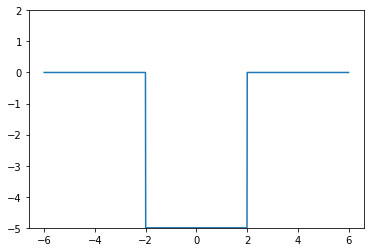

In [8]:
#CONTIENT LA PLAGE DES VALEURS DE X UTILES,LA VALEUR DE LA PREMIERE DERIVEE EN x_m, ET LE POTENTIEL. TRACE LE POTENTIEL.
V=V1 #potentiel utilisé
x_m=-6
x_M=6
dx=10**(-2)
eps=dx*10**(-5)
x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx))
plt.plot(x_range,V(x_range))
#plt.yscale('log')
plt.ylim(-5,2)

[-4.77, -4.09, -2.98, -1.5]

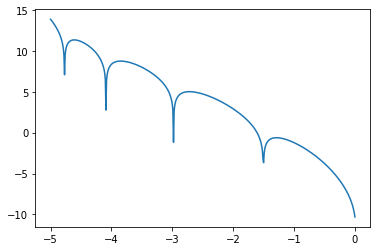

In [85]:
E_min=-5
E_max=0
dE=0.01
sens=-1
recherche(E_min,E_max,dE,sens)

Afficher les solutions intermédiaires ? (y/n) y
Afficher les graphiques intermédiaires ? (y/n) y


Passage 1 :  -4.775555555555555  Precision:  0.01
Passage 2 :  -4.770555555555555  Precision:  0.001
Passage 3 :  -4.770833333333333  Precision:  0.0001
Passage 4 :  -4.7708611111111106  Precision:  1e-05
Passage 5 :  -4.77086611111111  Precision:  1.0000000000000002e-06
Passage 6 :  -4.770866499999999  Precision:  1.0000000000000002e-07
Passage 7 :  -4.770866549999998  Precision:  1.0000000000000002e-08
Passage 8 :  -4.770866546111109  Precision:  1.0000000000000003e-09
Passage 9 :  -4.770866546388887  Precision:  1.0000000000000003e-10
Passage 10 :  -4.770866546361109  Precision:  1.0000000000000003e-11


-4.770866546361109

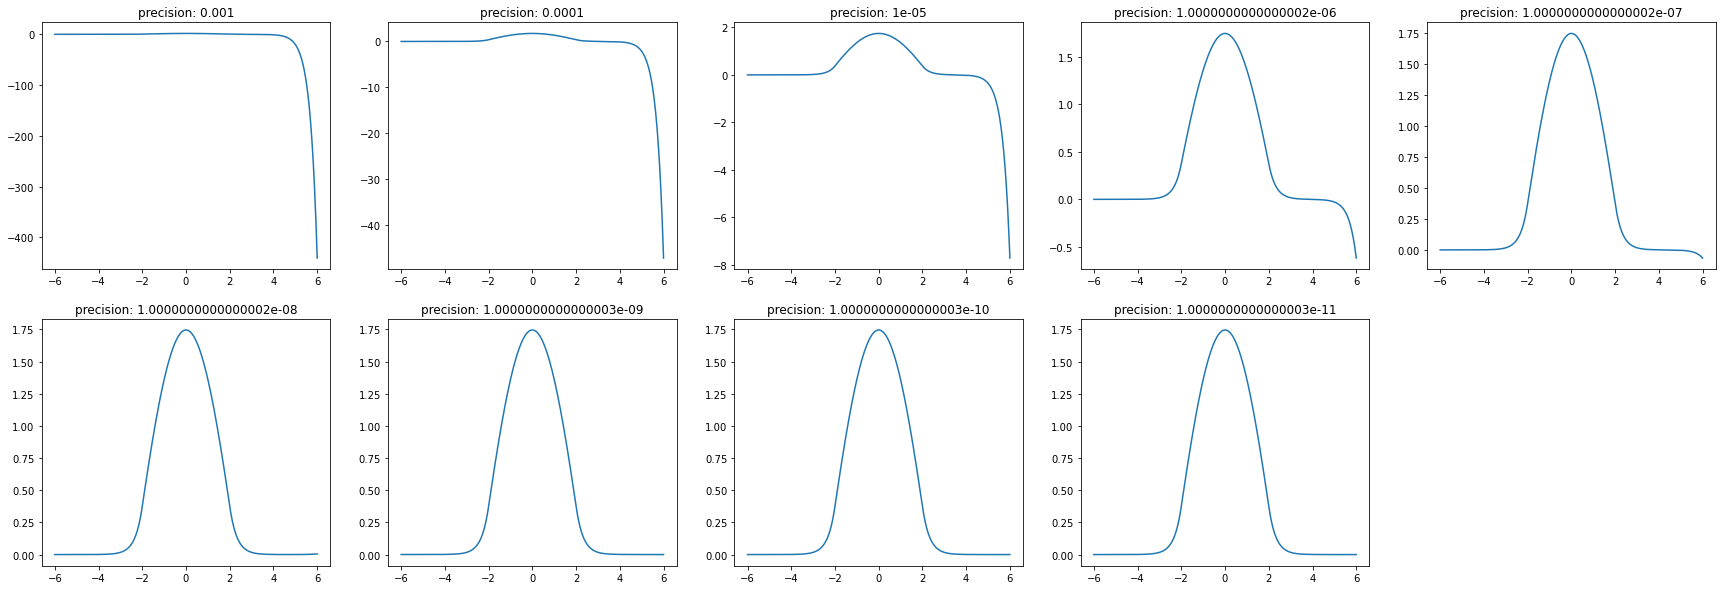

In [89]:
#CONTIENT LES VALEURS NECCESSAIRE A LA DICHOTOMIE. EFFECTUE LE CALCUL ADEQUAT
Nb_passage=10 #nombre de passage effectuées
It_passage=10 #nombre d'iterations effectuées à chaque passage (doit être > 4)
zoom=10 # valeur de l'augmentation de precision entre chaque passage
E_ini=-4.77 #valeur de depart de recherche de l'energie
delta_E=0.1 #étendue de recherche de l'énergie autour de E_ini
x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx))
dichotomie(V,x_range,Nb_passage,It_passage,zoom,E_ini,delta_E,eps)

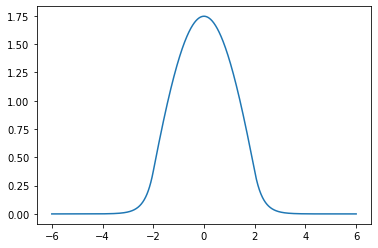

In [22]:
#TRACE LA FONCTION D'ONDE POUR L'ENERGIE E_eval.
#E_eval=  0.350038719177246
#E_eval=  0.7254353525943745
#E_eval=-0.09602050368929597
E_eval=-4.770866546361109
#E_eval=-2.979095001220704
psi_range=np.zeros(len(x_range))
psi_range[0] = 0
psi_range[1] = eps
out=numerov(psi_range,x_range,V,E_eval,1)
plt.plot(x_range,out)

Afficher les solutions intermédiaires ? (y/n) n
Afficher les graphiques intermédiaires ? (y/n) n
Afficher les solutions intermédiaires ? (y/n) n
Afficher les graphiques intermédiaires ? (y/n) n
Afficher les solutions intermédiaires ? (y/n) n
Afficher les graphiques intermédiaires ? (y/n) n
Afficher les solutions intermédiaires ? (y/n) n
Afficher les graphiques intermédiaires ? (y/n) n


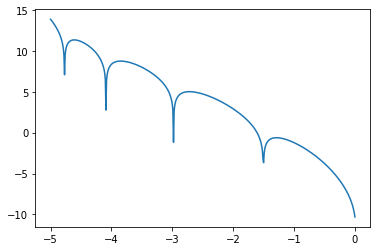

In [92]:
E_min=-5
E_max=0
dE=0.01
sens=1

Nb_passage=10 #nombre de passage effectuées
It_passage=10 #nombre d'iterations effectuées à chaque passage (doit être > 4)
zoom=10 # valeur de l'augmentation de precision entre chaque passage



E_lin_list=recherche_lin(E_min,E_max,dE,sens)
E_dich_list=[]
for i in range(0,len(E_lin_list)):
    E_ini=E_lin_list[i] #valeur de depart de recherche de l'energie
    delta_E=0.1 #étendue de recherche de l'énergie autour de E_ini
    x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx))
    E_dich_list.append(dichotomie(V,x_range,Nb_passage,It_passage,zoom,E_ini,delta_E,eps))

In [93]:
print(E_dich_list)

[-4.770866546361109, -4.08976114245, -2.979794364705556, -1.5040255783277778]
